In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import datetime as dt
import xarray as xr
import netCDF4 as nc


In [2]:
df = pd.read_csv('../data_files/melt_timeseries_monthly.csv')
df

dec_yr  monthly_discharge
0    2000.038251           3.907993
1    2000.122951           0.576798
2    2000.202186           0.567967
3    2000.286885          17.352713
4    2000.368852          58.140553
..           ...                ...
247  2020.620219        1043.337400
248  2020.704918          70.971940
249  2020.786885          81.353440
250  2020.871585           0.550097
251  2020.953552           0.591540

[252 rows x 2 columns]

In [3]:
# Convert the decimal year to datetime
df['date'] = pd.to_datetime(df['dec_yr'].astype(int), format='%Y') + \
             pd.to_timedelta((df['dec_yr'] % 1) * 365.25, unit='d')

print(df.head())

        dec_yr  monthly_discharge                          date
0  2000.038251           3.907993 2000-01-14 23:18:41.311440000
1  2000.122951           0.576798 2000-02-14 21:47:12.786864000
2  2000.202186           0.567967 2000-03-14 20:21:38.360678400
3  2000.286885          17.352713 2000-04-14 18:50:09.836102400
4  2000.368852          58.140553 2000-05-14 17:21:38.360678400


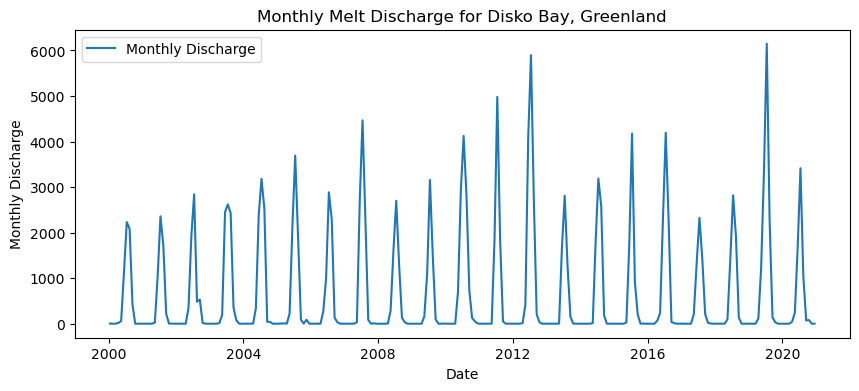

In [5]:
# Identify the peak discharge for 2012 and 2019
peak_2012 = df['monthly_discharge'][df['date'].dt.year == 2012].idxmax()
peak_2019 = df['monthly_discharge'][df['date'].dt.year == 2019].idxmax()

# Create a plot of the 'monthly_discharge' column
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['monthly_discharge'], label='Monthly Discharge')

# Annotate the plot with arrows and text at the peak discharge for 2012 and 2019
plt.annotate('Peak 2012', xy=(peak_2012, df['monthly_discharge'][peak_2012]), 
             xytext=(peak_2012, df['monthly_discharge'][peak_2012] + 10),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.annotate('Peak 2019', xy=(peak_2019, df['monthly_discharge'][peak_2019]), 
             xytext=(peak_2019, df['monthly_discharge'][peak_2019] + 10),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Monthly Discharge')
plt.title('Monthly Melt Discharge for Disko Bay, Greenland')
plt.legend()

# Display the plot
plt.show()
plt.close()

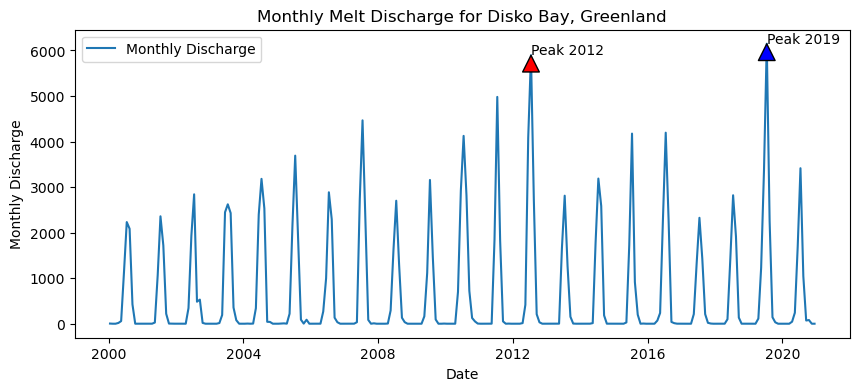

In [23]:
import matplotlib.pyplot as plt

# Identify the peak discharge for 2012 and 2019
peak_2012 = df['monthly_discharge'][df['date'].dt.year == 2012].idxmax()
peak_2019 = df['monthly_discharge'][df['date'].dt.year == 2019].idxmax()

# Create a plot of the 'monthly_discharge' column
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['monthly_discharge'], label='Monthly Discharge')

# Annotate the plot with arrows and text at the peak discharge for 2012 and 2019
plt.annotate('Peak 2012', xy=(df['date'][peak_2012], df['monthly_discharge'][peak_2012]), 
             xytext=(df['date'][peak_2012], df['monthly_discharge'][peak_2012] + 10),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.annotate('Peak 2019', xy=(df['date'][peak_2019], df['monthly_discharge'][peak_2019]), 
             xytext=(df['date'][peak_2019], df['monthly_discharge'][peak_2019] + 10),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Monthly Discharge')
plt.title('Monthly Melt Discharge for Disko Bay, Greenland')
plt.legend()

# Display the plot
plt.show()
plt.close()

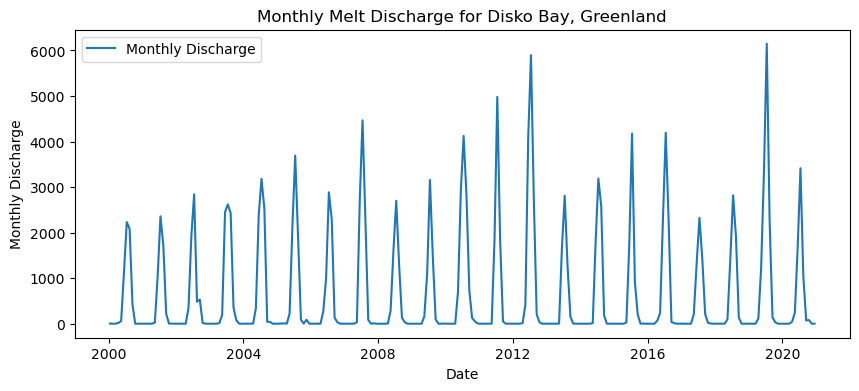

In [27]:
import matplotlib.pyplot as plt

# Identify the peak discharge for 2012 and 2019
peak_2012 = df['monthly_discharge'][df['date'].dt.year == 2012].idxmax()
peak_2019 = df['monthly_discharge'][df['date'].dt.year == 2019].idxmax()

# Create a plot of the 'monthly_discharge' column
plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['monthly_discharge'], label='Monthly Discharge')

# Annotate the plot with arrows and text at the peak discharge for 2012 and 2019
# plt.annotate('Peak 2012', xy=(df['date'][peak_2012], df['monthly_discharge'][peak_2012]), 
#              xytext=(df['date'][peak_2012], df['monthly_discharge'][peak_2012] + 10),
#              arrowprops=dict(arrowstyle='->', color='red'))

# plt.annotate('Peak 2019', xy=(df['date'][peak_2019], df['monthly_discharge'][peak_2019]), 
#              xytext=(df['date'][peak_2019], df['monthly_discharge'][peak_2019] + 10),
#              arrowprops=dict(arrowstyle='->', color='blue'))

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Monthly Discharge')
plt.title('Monthly Melt Discharge for Disko Bay, Greenland')
plt.legend()

# Display the plot
plt.show()
plt.close()

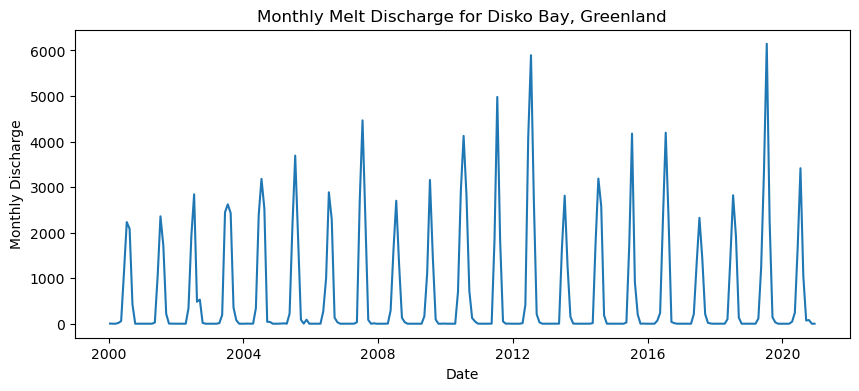

In [28]:
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Create a line plot of the 'monthly_discharge' column
sns.lineplot(x='date', y='monthly_discharge', data=df, ax=ax)

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Discharge')
ax.set_title('Monthly Melt Discharge for Disko Bay, Greenland')

# Display the plot
plt.show()

In [6]:
import glob

# glob all the files in the transposed directory
transposed_directory = '/Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Transposed'
transposed_files = glob.glob(f"{transposed_directory}/*.nc")
transposed_files.sort()
print("{:d} .nc files in {:s}".format(len(transposed_files), transposed_directory))
# Open all the transposed files and combine them into a single dataset by coordinates
ds = xr.open_mfdataset(transposed_files, combine='by_coords')


20 .nc files in /Volumes/Seagate/CHANGES/data_repository/CHL/Interpolated_Data/Transposed


In [7]:
# convert the ds['time'] which is in the YYYYMMDD format to a datetime object
ds['time'] = pd.to_datetime(ds['time'].astype(str), format='%Y%m%d')


In [8]:
# Create a new coordinate 'year_month' that represents the year and month
ds['year_month'] = ds['time'].dt.strftime('%Y-%m')

# Group the data by 'year_month' and take the mean for each group
ds_monthly = ds.groupby('year_month').mean()



In [9]:
# get the average chla value in ds_monthly['chla'][3]
# ds_monthly['chla'][6].values

# for each non-nan value in ds_monthly['chla'][6].values, get the mean of the values
# np.nanmean(ds_monthly['chla'][6].values)
ds_monthly['chla'][1]['year_month'].values

array('1998-02', dtype='<U7')

In [10]:
# chla_monthly = {}
# # get the number of groups in ds_monthly
# for i in range(len(ds_monthly['chla'])):
#     # get the mean of the non-nan values in ds_monthly['chla'][i].values
#     print("{:d} of {:d}".format(i, len(ds_monthly['chla'])))
#     chla_monthly[ds_monthly['chla'][i]['year_month'].values] = np.nanmean(ds_monthly['chla'][i].values)

# chla_monthly = {}
# # get the number of groups in ds_monthly
# for i in range(len(ds_monthly['chla'])):
#     # get the mean of the non-nan values in ds_monthly['chla'][i].values
#     print("{:d} of {:d}".format(i, len(ds_monthly['chla'])))
#     year_month = tuple(ds_monthly['chla'][i]['year_month'].values.tolist())
#     chla_monthly[year_month] = np.nanmean(ds_monthly['chla'][i].values)


import time

chla_monthly = {}

# Start the timer
start_time = time.time()

# get the number of groups in ds_monthly
for i in range(len(ds_monthly['chla'])):
    # get the mean of the non-nan values in ds_monthly['chla'][i].values
    print("{:d} of {:d}".format(i+1, len(ds_monthly['chla'])), end='\r')
    year_month = tuple(ds_monthly['chla'][i]['year_month'].values.tolist())
    chla_monthly[year_month] = np.nanmean(ds_monthly['chla'][i].values)

# End the timer and print the elapsed time
end_time = time.time()
print("\nElapsed time: {:.2f} seconds".format(end_time - start_time))

/var/folders/5j/sp7zw9k97sdfqkf7m2vn2m4h0000gn/T/ipykernel_16574/2711105025.py:29: RuntimeWarning: Mean of empty slice
  chla_monthly[year_month] = np.nanmean(ds_monthly['chla'][i].values)


301 of 301
Elapsed time: 891.88 seconds


In [11]:
# print the max x and y values
print("Max x value: {:f}".format(ds['x'].max().values))
print("Min x value: {:f}".format(ds['x'].min().values))
print("Max y value: {:f}".format(ds['y'].max().values))
print("Min y value: {:f}".format(ds['y'].min().values))

# absolute value between the first and second x values
abs(ds['x'][0].values - ds['x'][1].values)

Max x value: -203475.000000
Min x value: -402475.000000
Max y value: -2084975.000000
Min y value: -2333975.000000


1000

In [35]:
# for key in chla_monthly.keys(): combine the values into a string YYYY-MM and convert to datetime and store in monthly_data with the value of chla_monthly[key]
monthly_data = {}
for key in chla_monthly.keys():
    monthly_data[dt.datetime.strptime(key, '%Y-%m')] = chla_monthly[key]
    

TypeError: strptime() argument 1 must be str, not tuple

In [12]:
monthly_data = {}
for key in chla_monthly.keys():
    # Join the characters in the key to form a 'YYYY-MM' string
    key_str = ''.join(key)
    monthly_data[dt.datetime.strptime(key_str, '%Y-%m')] = chla_monthly[key]

In [14]:
monthly_data

{datetime.datetime(1998, 1, 1, 0, 0): nan,
 datetime.datetime(1998, 2, 1, 0, 0): nan,
 datetime.datetime(1998, 3, 1, 0, 0): 0.13949295759331665,
 datetime.datetime(1998, 4, 1, 0, 0): 2.9524323820475225,
 datetime.datetime(1998, 5, 1, 0, 0): 2.3965662834209134,
 datetime.datetime(1998, 6, 1, 0, 0): 0.9621723569312671,
 datetime.datetime(1998, 7, 1, 0, 0): 0.8398250690179732,
 datetime.datetime(1998, 8, 1, 0, 0): 1.045761069078654,
 datetime.datetime(1998, 9, 1, 0, 0): 0.9487874618618775,
 datetime.datetime(1998, 10, 1, 0, 0): nan,
 datetime.datetime(1998, 11, 1, 0, 0): nan,
 datetime.datetime(1998, 12, 1, 0, 0): nan,
 datetime.datetime(1999, 1, 1, 0, 0): nan,
 datetime.datetime(1999, 2, 1, 0, 0): nan,
 datetime.datetime(1999, 3, 1, 0, 0): nan,
 datetime.datetime(1999, 4, 1, 0, 0): 0.6988649005379669,
 datetime.datetime(1999, 5, 1, 0, 0): 2.7222966323224336,
 datetime.datetime(1999, 6, 1, 0, 0): 1.1428709215559094,
 datetime.datetime(1999, 7, 1, 0, 0): 0.7073542346752921,
 datetime.datet

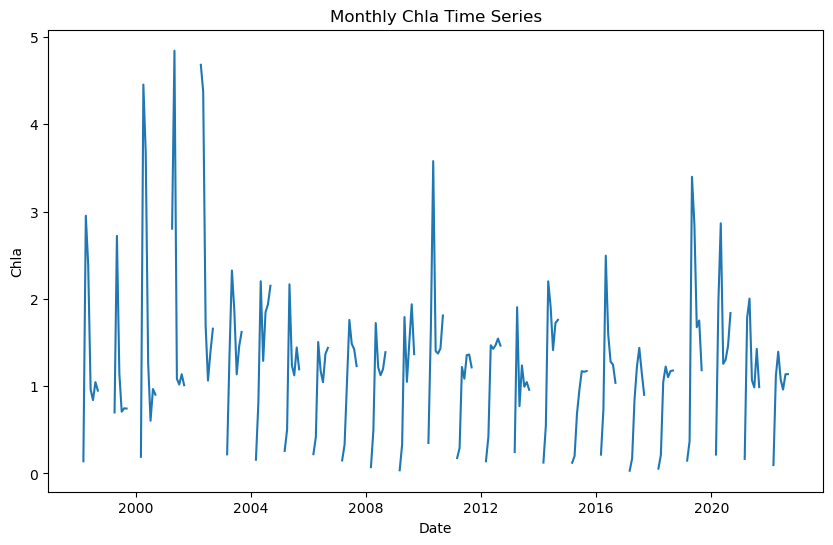

In [15]:

import matplotlib.pyplot as plt

# Create lists of dates and values
dates = list(monthly_data.keys())
values = list(monthly_data.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(dates, values)
plt.xlabel('Date')
plt.ylabel('Chla')
plt.title('Monthly Chla Time Series')
plt.show()

In [16]:
import numpy as np

monthly_data_nonnan = {k: 0 if np.isnan(v) else v for k, v in monthly_data.items()}

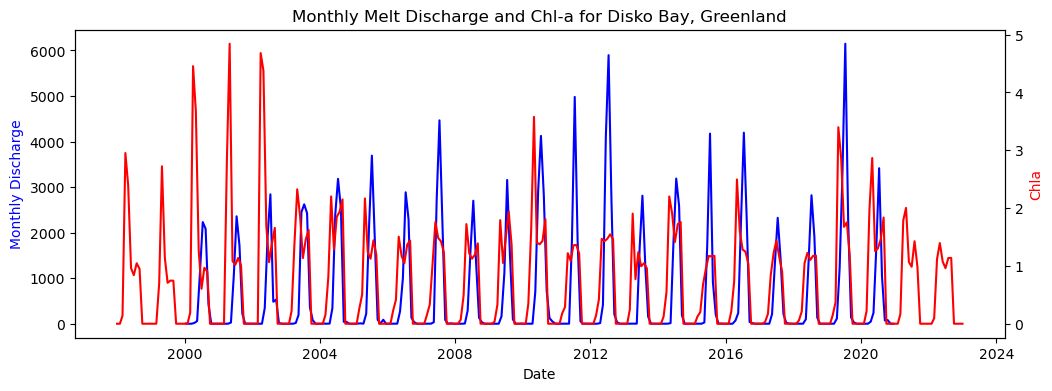

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create lists of dates and values for the chla data
dates = list(monthly_data_nonnan.keys())
values = list(monthly_data_nonnan.values())

# Create a figure and axis for the melt data
fig, ax1 = plt.subplots(figsize=(12, 4))

# Create a line plot of the 'monthly_discharge' column
sns.lineplot(x='date', y='monthly_discharge', data=df, ax=ax1, color='b')

# Set labels and title for the melt data
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Discharge', color='b')
ax1.set_title('Monthly Melt Discharge and Chl-a for Disko Bay, Greenland')

# Create a second y-axis for the chla data
ax2 = ax1.twinx()

# Create a line plot of the chla data
ax2.plot(dates, values, color='r')
ax2.set_ylabel('Chla', color='r')

# Display the plot
plt.show()

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create lists of dates and values for the chla data
dates = list(monthly_data_nonnan.keys())
values = list(monthly_data_nonnan.values())

# Split the data into two parts
dates1 = [date for date in dates if 1998 <= date.year <= 2002]
values1 = [value for date, value in zip(dates, values) if 1998 <= date.year <= 2002]

dates2 = [date for date in dates if 2003 <= date.year <= 2023]
values2 = [value for date, value in zip(dates, values) if 2003 <= date.year <= 2023]

In [ ]:
import pandas as pd

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year from 'date' column
df['year'] = df['date'].dt.year

# Then, in your lineplot, replace 'date' with 'year'
sns.lineplot(x='year', y='monthly_discharge', data=df, ax=ax1, linewidth = 2, color=melt_color)

In [70]:
df['date']

0     2000-01-14 23:18:41.311440000
1     2000-02-14 21:47:12.786864000
2     2000-03-14 20:21:38.360678400
3     2000-04-14 18:50:09.836102400
4     2000-05-14 17:21:38.360678400
                   ...             
247   2020-08-14 12:50:09.836102400
248   2020-09-14 11:18:41.311440000
249   2020-10-14 09:50:09.836102400
250   2020-11-14 08:18:41.311440000
251   2020-12-14 06:50:09.836102400
Name: date, Length: 252, dtype: datetime64[ns]

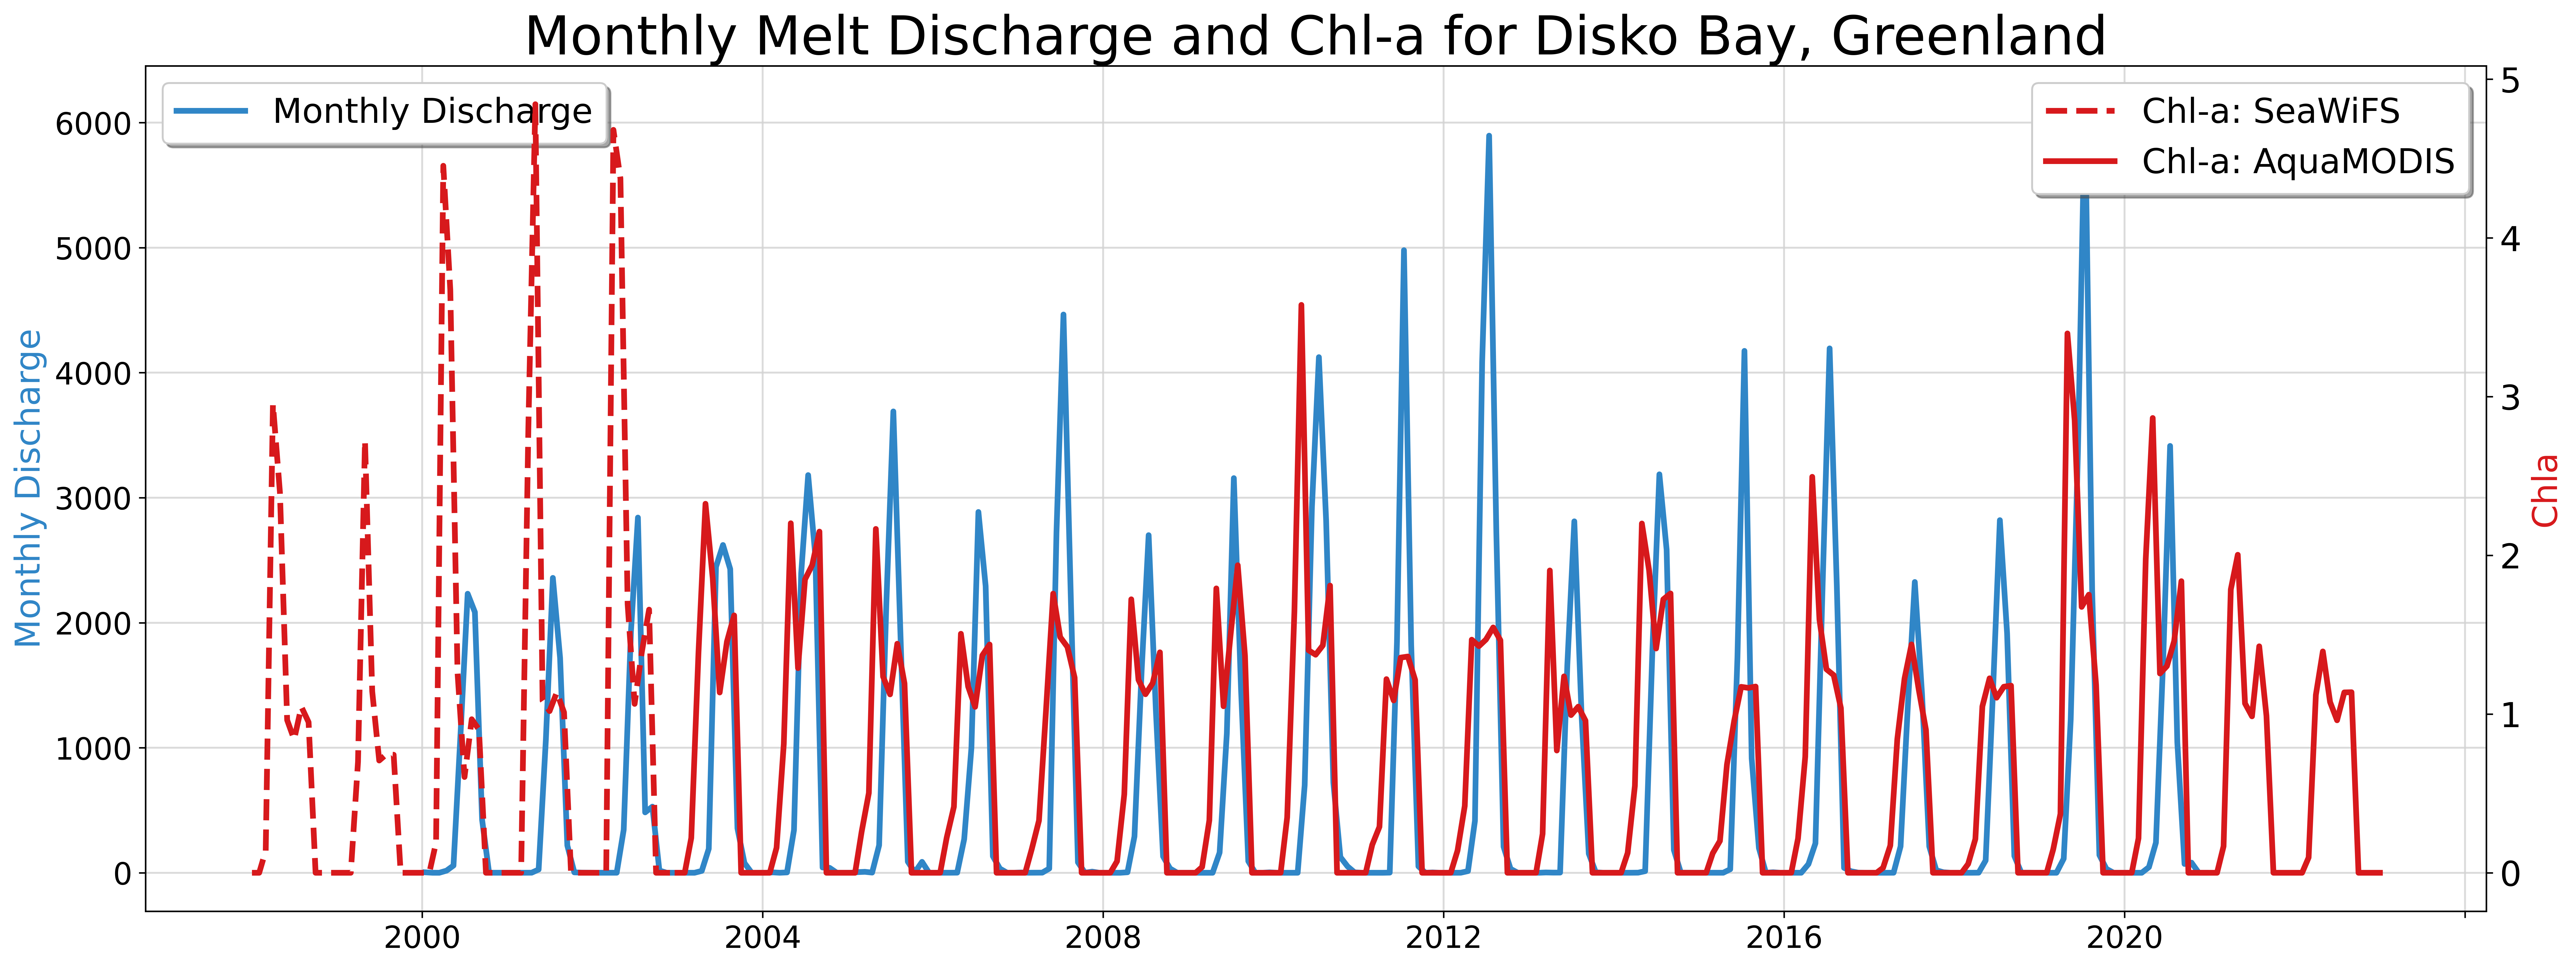

In [92]:
# Create a figure and axis for the melt data
# fig, ax1 = plt.subplots(figsize=(20, 8), dpi=400)
# fig, ax1 = plt.subplots(figsize=(30, 12), dpi=600)
fig, ax1 = plt.subplots(figsize=(22, 8), dpi=600)

# Create a line plot of the 'monthly_discharge' column
# sns.lineplot(x='date', y='monthly_discharge', data=df, ax=ax1, linewidth = 2, color=melt_color)

# Set labels and title for the melt data
# ax1.set_xlabel('Date', fontsize=16)
ax1.plot(df['date'], df['monthly_discharge'], linewidth = 3, color=melt_color, label='Monthly Discharge')
ax1.set_ylabel('Monthly Discharge', color=melt_color, fontsize=18)
ax1.set_title('Monthly Melt Discharge and Chl-a for Disko Bay, Greenland', fontsize=28)
ax1.tick_params(axis='both', labelsize=16)
# Set x-axis limits
# ax1.set_xlim([1998, 2023])
# ax1.set_xlim([df['date'].min(), df['date'].max()])
ax1.legend(fontsize=18, shadow=True, loc='upper left')

# Create a second y-axis for the chla data
ax2 = ax1.twinx()

# Create line plots of the chla data
ax2.plot(dates1, values1, color=chla_color, linestyle ="--", linewidth = 3, label='Chl-a: SeaWiFS')
ax2.plot(dates2, values2, color=chla_color, linewidth = 3, label='Chl-a: AquaMODIS')
ax2.set_ylabel('Chla', color=chla_color, fontsize=18)
ax2.tick_params(axis='both', labelsize=18)

# Add a legend
ax2.legend(fontsize=18, shadow=True, loc='upper right')

# light grey gridlines
ax1.grid(color='lightgrey', linestyle='-', linewidth=1, alpha=0.8)

# Hide the last x-tick label
labels = ax1.get_xticklabels()
labels[-1].set_visible(False)

# save the plot
plt.savefig('../plots/melt_chla_timeseries.png', dpi=600, transparent=True)

plt.show()
plt.close('all')

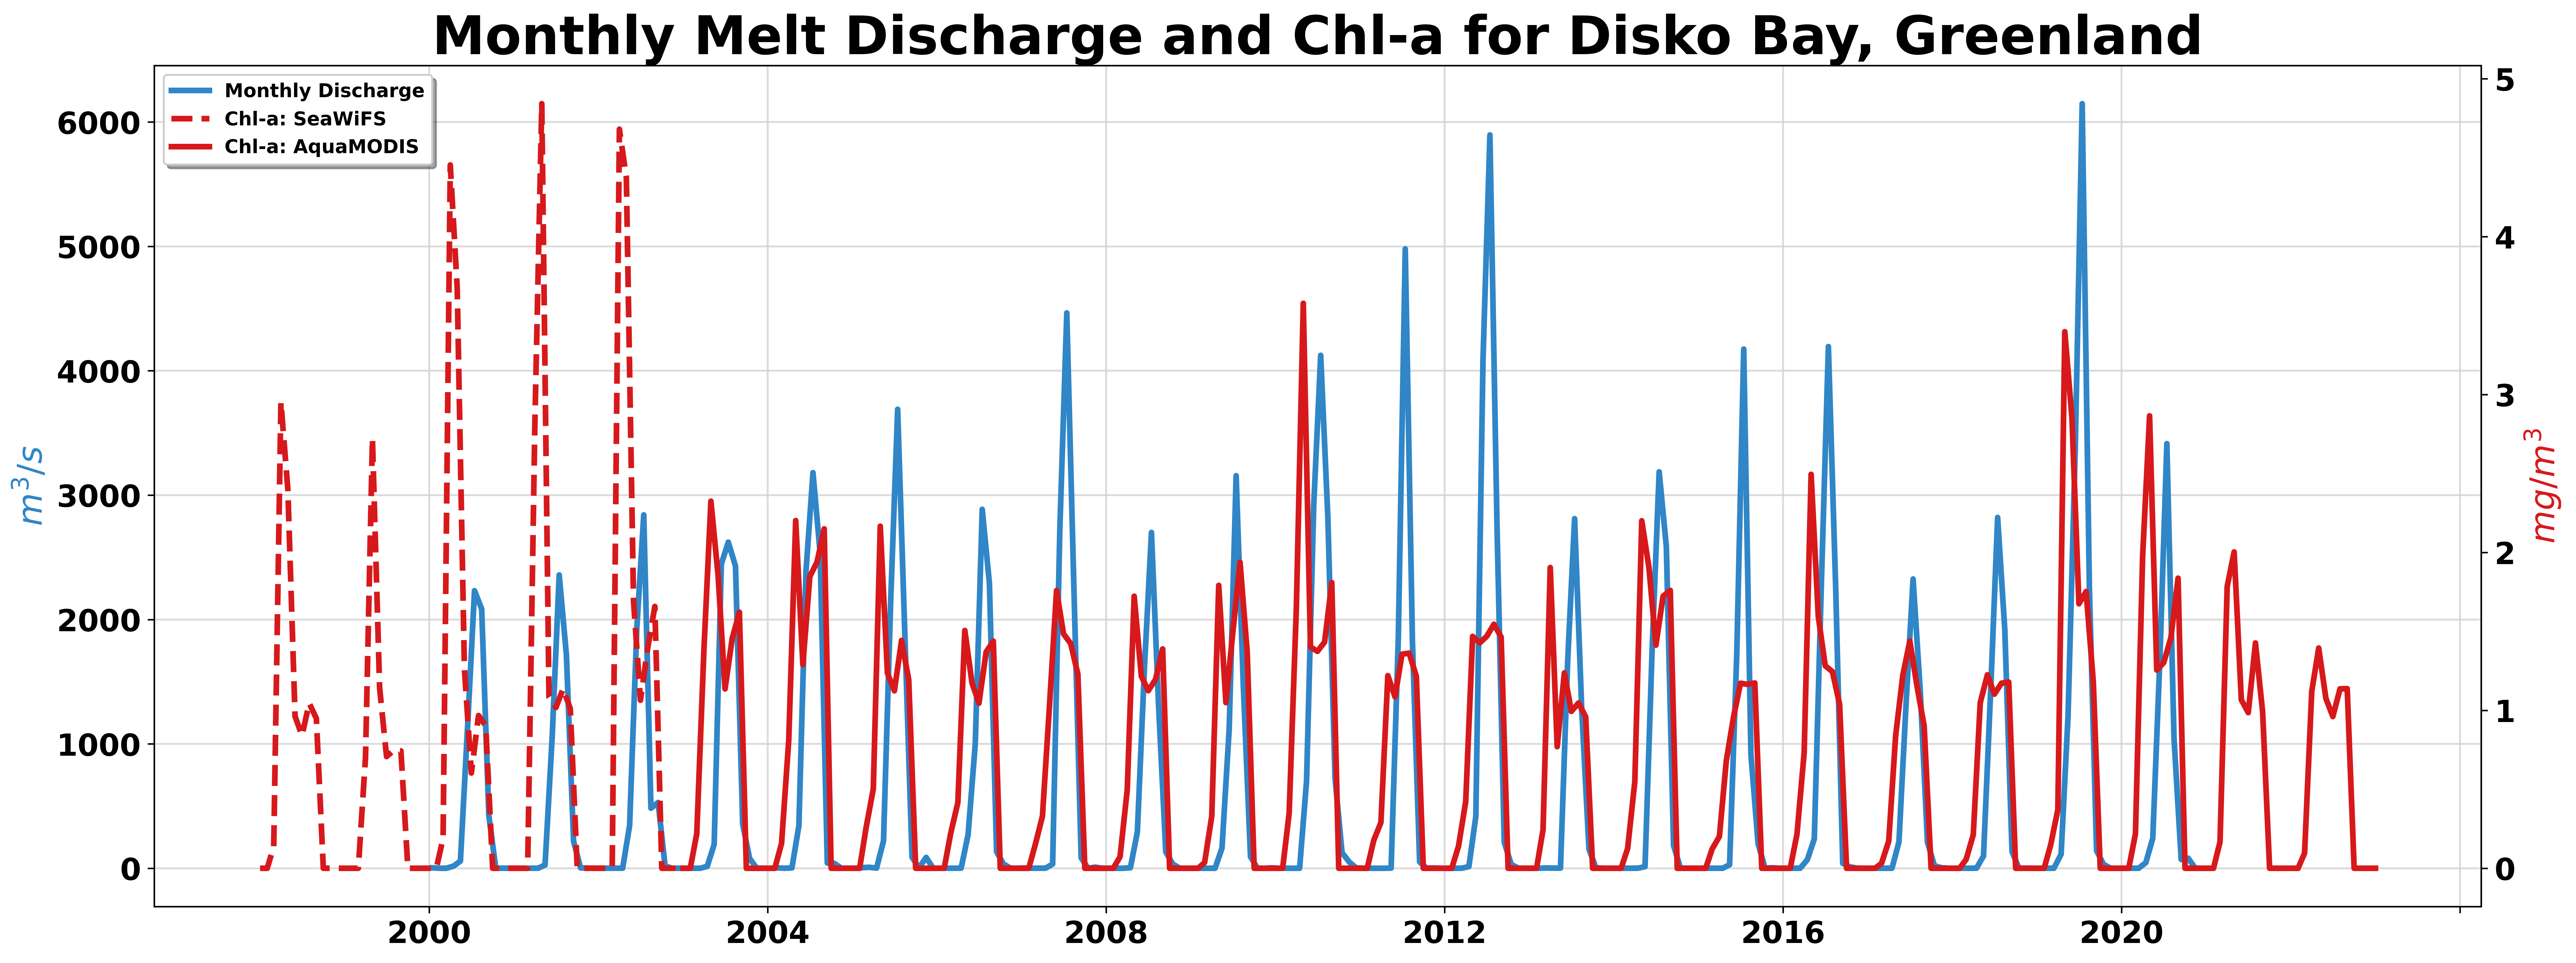

In [110]:
# Create a figure and axis for the melt data
fig, ax1 = plt.subplots(figsize=(22, 8), dpi=600)

# Create a line plot of the 'monthly_discharge' column
ax1.plot(df['date'], df['monthly_discharge'], linewidth = 3, color=melt_color, label='Monthly Discharge')
ax1.set_ylabel('$m^3/s$', color=melt_color, fontsize=18, weight='bold')
ax1.set_title('Monthly Melt Discharge and Chl-a for Disko Bay, Greenland', fontsize=28 ,fontdict={'weight':'bold'})
ax1.tick_params(axis='both', labelsize=16) 

# Create a second y-axis for the chla data
ax2 = ax1.twinx()

# Create line plots of the chla data
ax2.plot(dates1, values1, color=chla_color, linestyle ="--", linewidth = 3, label='Chl-a: SeaWiFS') 
ax2.plot(dates2, values2, color=chla_color, linewidth = 3, label='Chl-a: AquaMODIS')
# ax2.set_ylabel('$mg/m^3$', color=chla_color, fontsize=18, fontdict={'weight':'bold'})
ax2.set_ylabel('$mg/m^3$', color=chla_color, fontsize=18, weight='bold')
# ax2.tick_params(axis='both', labelsize=18)
ax2.tick_params(axis='both', labelsize=16) 

# light grey gridlines
ax1.grid(color='lightgrey', linestyle='-', linewidth=1, alpha=0.8)

# Hide the last x-tick label
labels = ax1.get_xticklabels()
labels[-1].set_visible(False)

# Get the legend handles and labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine the handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Create a single legend
ax1.legend(handles, labels, fontsize=20, shadow=True, loc='upper left', prop={'weight':'bold'})

# Set the font size and weight for x-axis tick labels
for label in ax1.get_xticklabels():
    label.set_fontsize(16)
    label.set_fontweight('bold')

# Set the font size and weight for y-axis tick labels
for label in ax1.get_yticklabels():
    label.set_fontsize(16)
    label.set_fontweight('bold')

for label in ax2.get_xticklabels():
    label.set_fontsize(16)
    label.set_fontweight('bold')

# Set the font size and weight for y-axis tick labels
for label in ax2.get_yticklabels():
    label.set_fontsize(16)
    label.set_fontweight('bold')


# Save the plot
plt.savefig('../plots/melt_chla_timeseries.png', dpi=600, transparent=True)

plt.show()
plt.close('all')

In [80]:
chla_color = '#ca0020'
chla_color = '#d7191c'
#fc8d62
melt_color='#0571b0'
melt_color = '#2c7bb6'
melt_color='#3086c7'#3492d9'

In [46]:
R,G,B = [115,	182,	224	]

melt_color = "#{:02x}{:02x}{:02x}".format(R, G, B)

print(melt_color)

#73b6e0


In [39]:
R,G,B = [148,	187,	164	]	
chla_color = "#ff6253"
chla_color = "#{:02x}{:02x}{:02x}".format(R, G, B)

print(chla_color)

#94bba4
